# Señales "normales"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000       # frecuencia de muestreo (Hz)
t = np.arange(0, 0.05, 1/fs)  # vector de tiempo (50 ms)

f = 50          # frecuencia original de la señal (Hz)
A = 1           # amplitud

# Señal coseno original
x = A * np.cos(2 * np.pi * f * t)

# Señal con error de frecuencia (desviación de +5 Hz)
freq_error = 0
x_freq_error = A * np.cos(2 * np.pi * (f + freq_error) * t)

# Señal con error de fase (desplazamiento de 30 grados)
phase_error = np.deg2rad(180)  # convierte a radianes
x_phase_error = A * np.cos(2 * np.pi * f * t + phase_error)

# Señal con error de frecuencia y fase juntas
x_freq_phase_error = A * np.cos(2 * np.pi * (f + freq_error) * t + phase_error)

# Graficar todas las señales juntas
plt.figure(figsize=(12, 8))

plt.plot(t, x, label='Señal Original')
plt.plot(t, x_freq_error, label='Error de Frecuencia (+5 Hz)', linestyle='--')
plt.plot(t, x_phase_error, label='Error de Fase (30°)', linestyle=':')
plt.plot(t, x_freq_phase_error, label='Error de Frecuencia + Fase', linestyle='-.')

plt.title('Señal Cosenoidal con diferentes errores')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# Señales moduladas
## Incluyen errores de frecuencia y fase

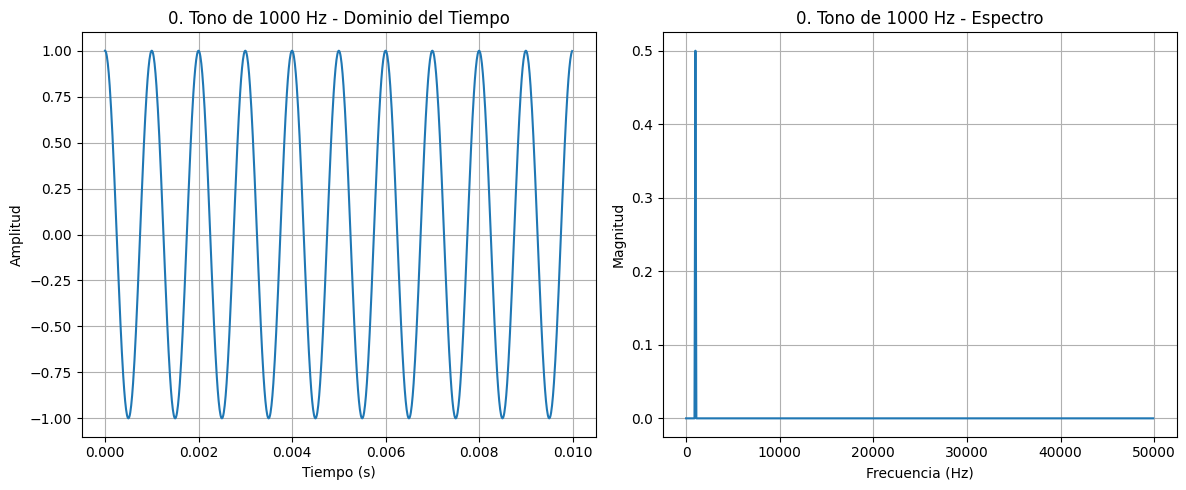

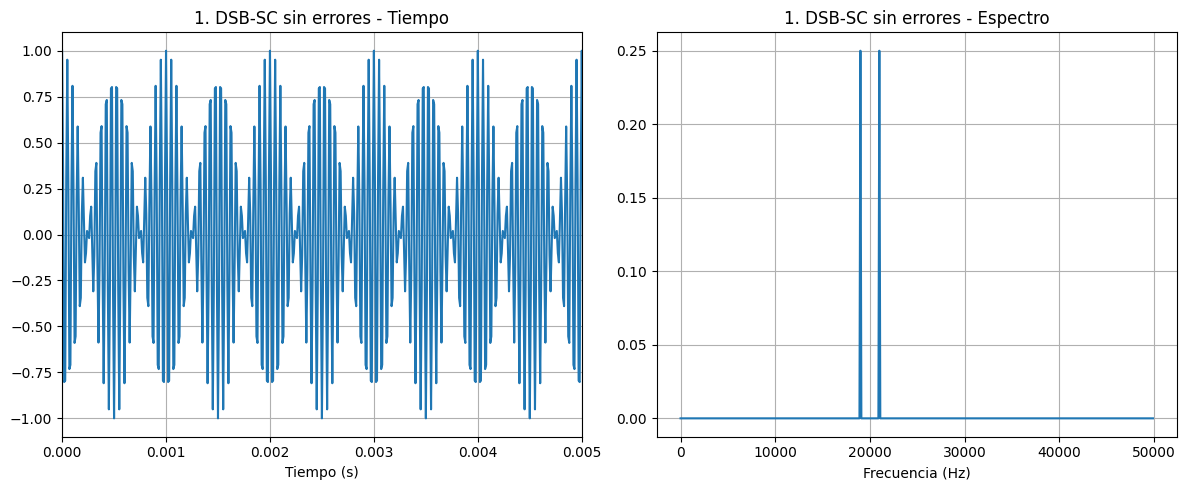

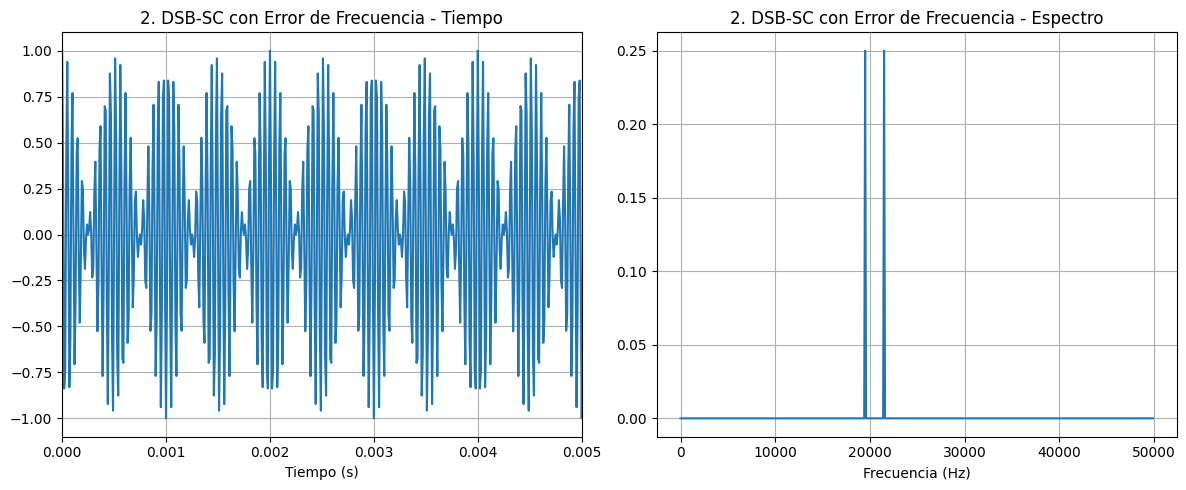

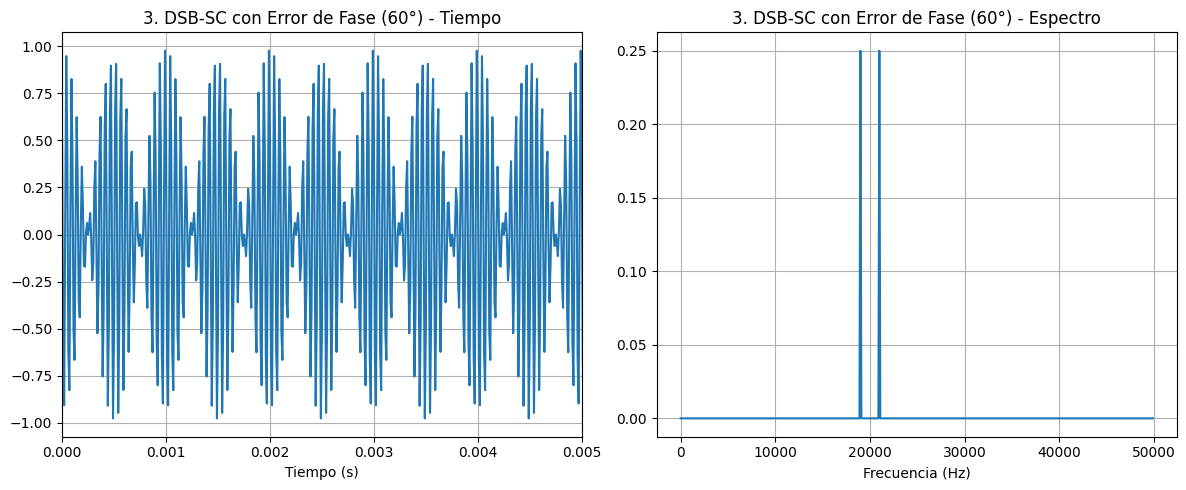

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# ---------- PARÁMETROS ----------
fs = 100_000              # Frecuencia de muestreo (Hz)
duration = 0.01           # Duración (10 ms)
t = np.arange(0, duration, 1/fs)  # Vector de tiempo

fm = 1000                 # Frecuencia del tono (Hz)
fc = 20_000               # Frecuencia de portadora (Hz)
amplitud = 1.0

# ---------- FUNCIÓN PARA FFT ----------
def compute_fft(signal, fs):
    N = len(signal)
    freqs = fftfreq(N, 1/fs)
    fft_vals = np.abs(fft(signal)) / N
    return freqs[:N//2], fft_vals[:N//2]

# ---------- 0. TONO ----------
mensaje = amplitud * np.cos(2 * np.pi * fm * t)

# Tiempo y espectro del tono
freqs_m, spec_m = compute_fft(mensaje, fs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t[:1000], mensaje[:1000])
plt.title("0. Tono de 1000 Hz - Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(freqs_m, spec_m)
plt.title("0. Tono de 1000 Hz - Espectro")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.tight_layout()
plt.show()


# ---------- 1. MODULACIÓN DSB-SC (sin errores) ----------
carrier = np.cos(2 * np.pi * fc * t)
dsb = mensaje * carrier

freqs_dsb, spec_dsb = compute_fft(dsb, fs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t[:1000], dsb[:1000])
plt.xlim(0, 0.005)
plt.title("1. DSB-SC sin errores - Tiempo")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(freqs_dsb, spec_dsb)
plt.title("1. DSB-SC sin errores - Espectro")
plt.xlabel("Frecuencia (Hz)")
plt.grid()
plt.tight_layout()
plt.show()


# ---------- 2. DSB-SC CON ERROR DE FRECUENCIA ----------
fc_error = fc + 500  # Error de frecuencia: +500 Hz
carrier_f_error = np.cos(2 * np.pi * fc_error * t)
dsb_freq_error = mensaje * carrier_f_error

freqs_dsb_fe, spec_dsb_fe = compute_fft(dsb_freq_error, fs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t[:1000], dsb_freq_error[:1000])
plt.xlim(0, 0.005)
plt.title("2. DSB-SC con Error de Frecuencia - Tiempo")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(freqs_dsb_fe, spec_dsb_fe)
plt.title("2. DSB-SC con Error de Frecuencia - Espectro")
plt.xlabel("Frecuencia (Hz)")
plt.grid()
plt.tight_layout()
plt.show()


# ---------- 3. DSB-SC CON ERROR DE FASE ----------
fase_error = np.deg2rad(60)  # 60 grados en radianes
carrier_phase_error = np.cos(2 * np.pi * fc * t + fase_error)
dsb_phase_error = mensaje * carrier_phase_error

freqs_dsb_pe, spec_dsb_pe = compute_fft(dsb_phase_error, fs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t[:1000], dsb_phase_error[:1000])
plt.xlim(0, 0.005)
plt.title("3. DSB-SC con Error de Fase (60°) - Tiempo")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(freqs_dsb_pe, spec_dsb_pe)
plt.title("3. DSB-SC con Error de Fase (60°) - Espectro")
plt.xlabel("Frecuencia (Hz)")
plt.grid()
plt.tight_layout()
plt.show()
